# Práctica 1: Bag of Words (BOW)

#### Integrantes: Alejandro Bolaños García y David García Díaz

### Lectura de datos
Se leen los distintos documentos, cuyos contenidos son almacenados en una lista $ (docx\_content) $ en la que cada elemento de la lista se trata del texto de cada documento, con lo cual se tendrán tantos elementos como documentos a leer existan.

In [17]:
import os
from docx import Document

docs = "docs"

def read_docx(directory_path):
    
    docx_files = []

    all_files = os.listdir(directory_path)
    
    for file in all_files:
        if file.endswith('.docx'):
            docx_files.append(file)
    
    docx_contents = []
    
    for file in docx_files:
        file_path = os.path.join(directory_path, file)
        try:
            doc = Document(file_path)
            content = ' '.join([para.text for para in doc.paragraphs])
            
            docx_contents.append(content)
        except Exception as e:
            docx_contents[file] = f"Error reading file: {e}"
    
    return docx_contents

read_docx(docs)




['Nuevo smartphone de alta gama promete revolucionar el mercado  Hoy se anunció el lanzamiento del último smartphone de la reconocida marca Tecnophone. Este nuevo dispositivo, denominado Tecnophone XZ, promete características sobresalientes que seguramente causarán revuelo en la industria móvil. Incorpora una pantalla OLED de 6.7 pulgadas, un procesador de última generación y una memoria RAM de 12 GB. Además, para los amantes de la fotografía, el Tecnophone XZ posee una cámara triple con una resolución de 108 megapíxeles. Los expertos ya lo han calificado como el "móvil del año" y esperan ver su impacto en el mercado en los próximos meses. ',
 'La duración de la batería en smartphones: un desafío constante  La vida útil de la batería se ha convertido en uno de los temas más discutidos en el mundo de los smartphones. Con la constante demanda de aplicaciones y servicios que consumen grandes cantidades de energía, los fabricantes están bajo presión para ofrecer soluciones innovadoras. Rec

### Preprocesamiento de los textos
Los textos de la lista mencionada anteriormente se procesan tranformando las palabras a minúsculas, eliminando los $"stop\ words"$ y filtrando los signos de puntuación del texto; dicho de otra forma hemos tokenizado el contenido de los documentos.

In [18]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


def preprocess_text(text):

    puntucaction = '!"\#$%&\'\'()*+,-./:;<=>?@[\]^_``{|}~¿¡'
    text = text.lower()

    words = word_tokenize(text)
    words_clean = [word for word in words if word not in puntucaction]

    stop_words = set(stopwords.words('spanish'))
    filtered_words = [word for word in words_clean if word not in stop_words]
    
    return filtered_words

tokenized_text = []

for text in read_docx(docs):
    tokenized_text.append(preprocess_text(text))
    
print(tokenized_text)

[['nuevo', 'smartphone', 'alta', 'gama', 'promete', 'revolucionar', 'mercado', 'hoy', 'anunció', 'lanzamiento', 'último', 'smartphone', 'reconocida', 'marca', 'tecnophone', 'nuevo', 'dispositivo', 'denominado', 'tecnophone', 'xz', 'promete', 'características', 'sobresalientes', 'seguramente', 'causarán', 'revuelo', 'industria', 'móvil', 'incorpora', 'pantalla', 'oled', '6.7', 'pulgadas', 'procesador', 'última', 'generación', 'memoria', 'ram', '12', 'gb', 'además', 'amantes', 'fotografía', 'tecnophone', 'xz', 'posee', 'cámara', 'triple', 'resolución', '108', 'megapíxeles', 'expertos', 'calificado', 'móvil', 'año', 'esperan', 'ver', 'impacto', 'mercado', 'próximos', 'meses'], ['duración', 'batería', 'smartphones', 'desafío', 'constante', 'vida', 'útil', 'batería', 'convertido', 'temas', 'discutidos', 'mundo', 'smartphones', 'constante', 'demanda', 'aplicaciones', 'servicios', 'consumen', 'grandes', 'cantidades', 'energía', 'fabricantes', 'bajo', 'presión', 'ofrecer', 'soluciones', 'innov

### Creación del vocabulario y los Bags of Words 
Una vez se tiene el texto tokenizado, creamos nuestro vocabulario de palabras únicas para así representar los textos como vectores dentro del espacio de nuestro vocabulario, en el que cada elemento del vector resultante de cada documento corresponde con el número de aparaciones de una palabra del vocabulario en dicho documento. 

In [19]:
vocabulario_set = set()

for text in tokenized_text:
    for word in text:
        vocabulario_set.add(word)

vocabulario = list(vocabulario_set)
print("Cantidad de palabras en el vocabulario:", len(vocabulario))

bag_of_words = []

for text in tokenized_text:
    doc_vector = []
    for word in vocabulario:
        count = text.count(word)
        doc_vector.append(count)
    bag_of_words.append(doc_vector)

print("Longitud de vector:", len(bag_of_words[0]))


Cantidad de palabras en el vocabulario: 420
Longitud de vector: 420


### Visualización de los Bags of Words

In [20]:
print("Vocabulario:", vocabulario)

for i, text in enumerate(tokenized_text):
    print(f"Texto original: {text}")
    print(f"BoW: {bag_of_words[i]}")
    print("-" * 50)


Vocabulario: ['app', 'semana', 'beneficiarse', 'vaciar', 'próximos', 'creciente', 'realidad', 'muebles', 'servicio', 'duración', 'demanda', 'ofrece', 'liderado', 'conectada', 'cercanas', 'personal', '4000', 'usuarios', 'brilla', 'presentado', 'grado', 'disfrutar', 'compras', 'innovadora', 'adopción', 'público', 'revolucionar', 'última', 'considerados', 'expresarse', 'constante', 'desafío', 'ultra', 'tomar', 'instalados', 'tablet', 'café', 'pantallas', 'procesador', 'facilitando', 'cumple', 'embargo', 'dispositivos', 'subvención', 'electrocar', 'galaxyx', 'empresas', 'usuario', 'sobresalientes', 'promesa', 'banca', 'vez', 'compatible', 'innovación', 'aplicación', 'cero', 'tamaño', 'mundo', 'xz', 'calidad', 'dos', 'conductores', 'hoy', 'smarttech', 'calificado', 'paradas', 'comprar', 'ventas', 'diversas', 'salto', 'experiencias', 'cellflex', 'arduamente', 'pulgadas', 'móviles', 'tendencia', 'días', 'suite', 'comprarlos', '25', 'presentó', 'disponibles', 'sostenible', 'hogares', 'converti

### Similitud del coseno
Cada vector resultante, los cuales están almacenados en $bag\_of\_words$, son tranformados en tensores

In [5]:
import torch

tensor = torch.tensor(bag_of_words)
tensor = tensor.float()

comparacion_bow = torch.zeros(len(tensor), len(tensor))

for i in range(len(tensor)):
    for j in range(len(tensor)):
        cosine = torch.cosine_similarity(tensor[i], tensor[j], dim=0, eps=1e-8)
        comparacion_bow[i][j] = cosine
        
print(comparacion_bow)

tensor([[1.0000, 0.0432, 0.0000, 0.0766, 0.0964, 0.1353, 0.0624, 0.0148, 0.0000,
         0.0487, 0.1427, 0.0865],
        [0.0432, 1.0000, 0.0953, 0.0000, 0.0000, 0.1027, 0.1243, 0.0336, 0.0000,
         0.1109, 0.1874, 0.1094],
        [0.0000, 0.0953, 1.0000, 0.0000, 0.0000, 0.0331, 0.1032, 0.0163, 0.0000,
         0.0895, 0.0000, 0.0530],
        [0.0766, 0.0000, 0.0000, 1.0000, 0.0972, 0.0727, 0.0566, 0.1251, 0.2108,
         0.0000, 0.1328, 0.2442],
        [0.0964, 0.0000, 0.0000, 0.0972, 1.0000, 0.0573, 0.0000, 0.1876, 0.2029,
         0.0412, 0.1115, 0.0610],
        [0.1353, 0.1027, 0.0331, 0.0727, 0.0573, 1.0000, 0.1297, 0.0351, 0.0173,
         0.0772, 0.1304, 0.1028],
        [0.0624, 0.1243, 0.1032, 0.0566, 0.0000, 0.1297, 1.0000, 0.0182, 0.0000,
         0.0600, 0.1895, 0.1540],
        [0.0148, 0.0336, 0.0163, 0.1251, 0.1876, 0.0351, 0.0182, 1.0000, 0.0848,
         0.0190, 0.0897, 0.0337],
        [0.0000, 0.0000, 0.0000, 0.2108, 0.2029, 0.0173, 0.0000, 0.0848, 1.0000,

### Análisis y visualización

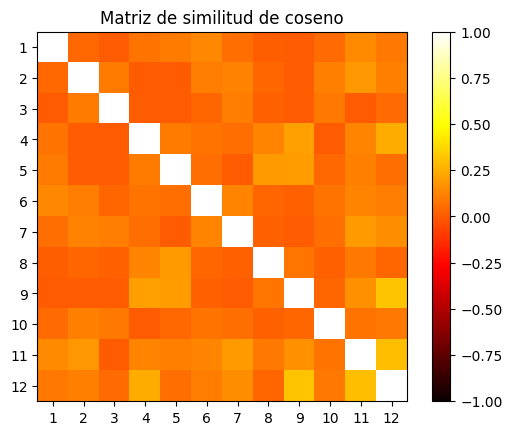

In [6]:
import matplotlib.pyplot as plt

plt.imshow(comparacion_bow, cmap='hot', interpolation='nearest', vmin=-1, vmax=1)
plt.title("Matriz de similitud de coseno")
plt.xticks(ticks=range(len(tensor)), labels=range(1, len(tensor) + 1))
plt.yticks(ticks=range(len(tensor)), labels=range(1, len(tensor) + 1)) 
plt.colorbar()
plt.show()

In [7]:
for i in range(len(comparacion_bow)):
    for j in range(len(comparacion_bow)):
        if comparacion_bow[i][j] > 0.3 and i != j:
            if i < j:
                print(f"Texto {i + 1} y texto {j + 1} son similares")


Texto 9 y texto 12 son similares
Texto 11 y texto 12 son similares


In [8]:
for i in range(len(comparacion_bow)):
    for j in range(len(comparacion_bow)):
        if 0 < comparacion_bow[i][j] < 0.05 and i != j:
            if i < j:
                print(f"Texto {i + 1} y texto {j + 1} no son similares")


Texto 1 y texto 2 no son similares
Texto 1 y texto 8 no son similares
Texto 1 y texto 10 no son similares
Texto 2 y texto 8 no son similares
Texto 3 y texto 6 no son similares
Texto 3 y texto 8 no son similares
Texto 5 y texto 10 no son similares
Texto 6 y texto 8 no son similares
Texto 6 y texto 9 no son similares
Texto 7 y texto 8 no son similares
Texto 8 y texto 10 no son similares
Texto 8 y texto 12 no son similares
Texto 9 y texto 10 no son similares


### TF-IDF 
- TF: Representa las frecuencias de las palabras en cada documento.
- IDF: Calcula la importancia de cada palabra basada en la cantidad de documentos en los que aparece.
- TF-IDF: Multiplica los valores de TF por los de IDF para cada término.

In [9]:
# Función para calcular el TF-IDF de los documentos

import numpy as np

def tf_idf_calculation(bag_of_words):
    bag_of_words = np.array(bag_of_words)
    words_per_document = np.sum(bag_of_words, axis=1, keepdims=True)

    tf = bag_of_words / words_per_document # Term Frequency

    N = len(bag_of_words)
    n_docs = np.sum((bag_of_words > 0), axis=0) # Número de documentos en los que aparece cada palabra

    idf = np.log(N / n_docs) # Inverse Document Frequency

    tf_idf = tf * idf

    return tf_idf

### Similitud del coseno TF-IDF

In [11]:
# Cálculo de la similitud de coseno usando TF-IDF

tf_idf = tf_idf_calculation(bag_of_words)

tf_idf_tensor = torch.tensor(tf_idf)
tf_idf_tensor = tf_idf_tensor.float()

comparacion_tf_idf = torch.zeros(len(tf_idf_tensor), len(tf_idf_tensor))

for i in range(len(tensor)):
    for j in range(len(tensor)):
        cosine = torch.cosine_similarity(tf_idf_tensor[i], tf_idf_tensor[j], dim=0, eps=1e-8)
        comparacion_tf_idf[i][j] = cosine


### Similitud del coseno BOW - Similitud del coseno TF-IDF

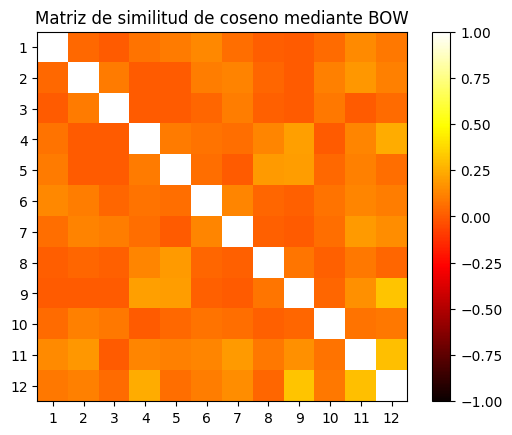

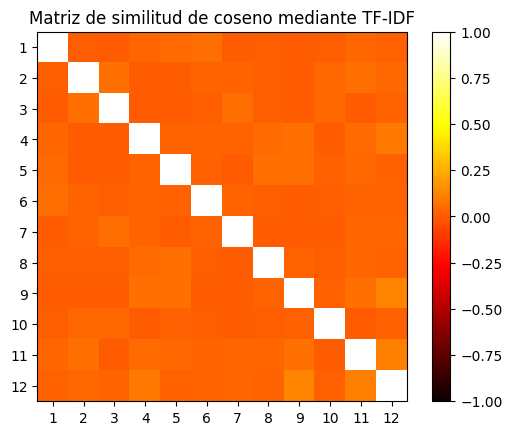

In [12]:
# Visualización de la matriz de similitud de coseno usando BOW y TF-IDF

import matplotlib.pyplot as plt

plt.imshow(comparacion_bow, cmap='hot', interpolation='nearest', vmin=-1, vmax=1)
plt.title("Matriz de similitud de coseno mediante BOW")
plt.xticks(ticks=range(len(tensor)), labels=range(1, len(tensor) + 1))
plt.yticks(ticks=range(len(tensor)), labels=range(1, len(tensor) + 1)) 
plt.colorbar()
plt.show()

plt.imshow(comparacion_tf_idf, cmap='hot', interpolation='nearest', vmin=-1, vmax=1)
plt.title("Matriz de similitud de coseno mediante TF-IDF")
plt.xticks(ticks=range(len(tensor)), labels=range(1, len(tensor) + 1))
plt.yticks(ticks=range(len(tensor)), labels=range(1, len(tensor) + 1)) 
plt.colorbar()
plt.show()

In [15]:
for i in range(len(comparacion_bow)):
    for j in range(len(comparacion_bow)):
        if comparacion_bow[i][j] > 0.3 and i != j:
            if i < j:
                print(f"BOW: Texto {i + 1} y texto {j + 1} son similares")

for i in range(len(comparacion_tf_idf)):
    for j in range(len(comparacion_tf_idf)):
        if comparacion_tf_idf[i][j] > 0.3 and i != j:
            if i < j:
                print(f"TF-IDF: Texto {i + 1} y texto {j + 1} son similares")


BOW: Texto 9 y texto 12 son similares
BOW: Texto 11 y texto 12 son similares


In [16]:
for i in range(len(comparacion_bow)):
    for j in range(len(comparacion_bow)):
        if 0 < comparacion_bow[i][j] < 0.05 and i != j:
            if i < j:
                print(f"BOW: Texto {i + 1} y texto {j + 1} no son similares")
print("\n")


for i in range(len(comparacion_tf_idf)):
    for j in range(len(comparacion_tf_idf)):
        if 0 < comparacion_tf_idf[i][j] < 0.05 and i != j:
            if i < j:
                print(f"TF-IDF: Texto {i + 1} y texto {j + 1} no son similares")


BOW: Texto 1 y texto 2 no son similares
BOW: Texto 1 y texto 8 no son similares
BOW: Texto 1 y texto 10 no son similares
BOW: Texto 2 y texto 8 no son similares
BOW: Texto 3 y texto 6 no son similares
BOW: Texto 3 y texto 8 no son similares
BOW: Texto 5 y texto 10 no son similares
BOW: Texto 6 y texto 8 no son similares
BOW: Texto 6 y texto 9 no son similares
BOW: Texto 7 y texto 8 no son similares
BOW: Texto 8 y texto 10 no son similares
BOW: Texto 8 y texto 12 no son similares
BOW: Texto 9 y texto 10 no son similares


TF-IDF: Texto 1 y texto 2 no son similares
TF-IDF: Texto 1 y texto 4 no son similares
TF-IDF: Texto 1 y texto 5 no son similares
TF-IDF: Texto 1 y texto 7 no son similares
TF-IDF: Texto 1 y texto 8 no son similares
TF-IDF: Texto 1 y texto 10 no son similares
TF-IDF: Texto 1 y texto 11 no son similares
TF-IDF: Texto 1 y texto 12 no son similares
TF-IDF: Texto 2 y texto 6 no son similares
TF-IDF: Texto 2 y texto 7 no son similares
TF-IDF: Texto 2 y texto 8 no son similar

Observando los resultados obtenidos vemos que mediante el uso de el $BoW$ para el cálculo de similitud del coseno obtenemos valores de este que nos indican que existen documentos similares, mientras que cuando se utiliza el $TF-IDF$ para el cálculo de la similitud vemos que es mucho más restrictivo dando lugar a la conclusión de que no existen documentos similares. Esto es debido a que $BoW$ tiende a exagerar la similitud porque no diferencia entre palabras comunes y palabras específicas. Esto puede dar la falsa impresión de que hay más similitud entre los documentos de la que realmente existe. Por otro lado el $TF-IDF$ proporciona una medida de similitud más precisa al dar un mayor valor a la importancia de las palabras, reduciendo la influencia de palabras comunes. Por eso, puedes ver que muchos documentos que parecían similares en la matriz de $BoW$ ya no lo parecen en la matriz de $TF-IDF$.